# Image Classification using CNN with "Food Images (Food-101)" dataset

- The dataset can be obtained from Kaggle(https://www.kaggle.com/kmader/food41)
- The dataset consists of 101 classes with 1000 images for each class
- The train dataset consists of 990 images for each class
- The valid dataset consists of 10 images for each class

- Import all the necessary libraries from fastai
- Define PATH,size and architecture python variables

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from fastai.models import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.plots import *

- Set the size of the images to be 128

In [4]:
PATH = 'data/food41/'
sz  = 128

In [5]:
arch=resnext50

In [6]:
os.listdir(PATH)

['test', 'valid', 'models', 'train', 'tmp']

In [7]:
os.listdir(f'{PATH}train')

['churros',
 'french_onion_soup',
 'fried_calamari',
 'pho',
 'bibimbap',
 'samosa',
 'deviled_eggs',
 'creme_brulee',
 'bread_pudding',
 'hamburger',
 'edamame',
 'baby_back_ribs',
 'tacos',
 'fish_and_chips',
 'apple_pie',
 'hummus',
 'gyoza',
 'mussels',
 'lasagna',
 'clam_chowder',
 'french_toast',
 'cheese_plate',
 'cheesecake',
 'beef_carpaccio',
 'spaghetti_bolognese',
 'sashimi',
 'spring_rolls',
 'guacamole',
 'spaghetti_carbonara',
 'risotto',
 'caprese_salad',
 'macarons',
 'eggs_benedict',
 'lobster_bisque',
 'tuna_tartare',
 'nachos',
 'ravioli',
 'macaroni_and_cheese',
 'ice_cream',
 'sushi',
 'club_sandwich',
 'red_velvet_cake',
 'chicken_curry',
 'onion_rings',
 'strawberry_shortcake',
 'cannoli',
 'miso_soup',
 'carrot_cake',
 'peking_duck',
 'caesar_salad',
 'donuts',
 'chicken_wings',
 'chocolate_mousse',
 'shrimp_and_grits',
 'filet_mignon',
 'oysters',
 'greek_salad',
 'fried_rice',
 'cup_cakes',
 'paella',
 'dumplings',
 'lobster_roll_sandwich',
 'french_fries',
 

In [9]:
File_list = os.listdir(f'{PATH}valid/samosa')
File_list

['2145594.jpg',
 '1490919.jpg',
 '942933.jpg',
 '812692.jpg',
 '107871.jpg',
 '3622297.jpg',
 '1239544.jpg',
 '3264343.jpg',
 '3140015.jpg',
 '1526228.jpg']

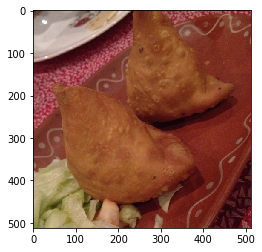

In [10]:
img = plt.imread(f'{PATH}valid/samosa/{File_list[9]}')
plt.imshow(img)

In [11]:
img.shape

(512, 512, 3)

In [12]:
img[:4,:4]

array([[[59, 38, 33],
        [58, 37, 32],
        [59, 39, 32],
        [60, 40, 33]],

       [[60, 39, 34],
        [59, 38, 33],
        [60, 40, 33],
        [64, 41, 35]],

       [[58, 37, 34],
        [57, 36, 31],
        [58, 37, 32],
        [64, 40, 36]],

       [[62, 38, 36],
        [61, 37, 35],
        [63, 39, 37],
        [67, 43, 39]]], dtype=uint8)

## Find learning rate
- Use lr_find() to find the learning rate

In [13]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute = True)
learn.lr_find()

100%|██████████| 16/16 [00:03<00:00,  4.63it/s]


 83%|████████▎ | 1290/1563 [00:22<00:04, 56.70it/s, loss=9.97]

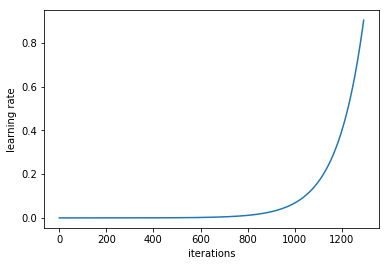

In [14]:
learn.sched.plot_lr()

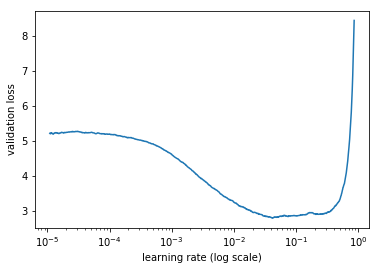

In [15]:
learn.sched.plot()

- Train the classifier for 3 epochs, with learning rate obtained from lr_find()

In [17]:
learn = ConvLearner.pretrained(arch, data, precompute = True)
learn.fit(0.03,3)

epoch      trn_loss   val_loss   accuracy                     
    0      2.207066   2.142324   0.474257  
    1      2.144113   2.084765   0.483168                     
    2      2.029415   2.024513   0.50297                      


[array([2.02451]), 0.5029702980919639]

## Data augmentation
- Perform data augmentation and train further

In [18]:
tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [19]:
data = ImageClassifierData.from_paths(PATH, tfms = tfms)
learn = ConvLearner.pretrained(arch, data, precompute = True)

In [20]:
learn.lr_find()

 83%|████████▎ | 1290/1563 [00:20<00:04, 61.47it/s, loss=9.55]

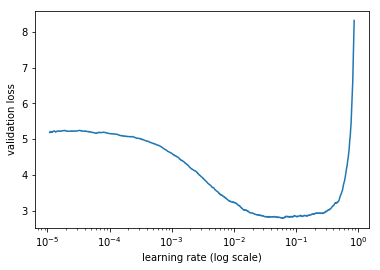

In [21]:
learn.sched.plot()

In [22]:
learn.precompute = False

In [23]:
learn.fit(0.03,3, cycle_len = 1)

epoch      trn_loss   val_loss   accuracy                     
    0      2.324261   2.159699   0.463366  
    1      2.203173   2.079684   0.489109                     
    2      2.122733   2.032829   0.49604                      


[array([2.03283]), 0.49603960396039604]

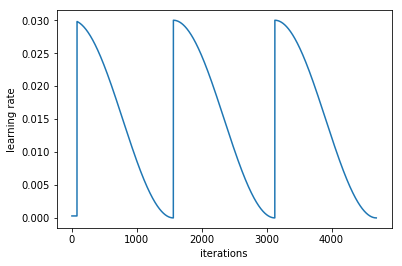

In [24]:
learn.sched.plot_lr()

- Save the model, the name indicates only the weights of the last fully connected layers were updated during the training process

In [25]:
learn.save('128_ResNext50_lastlayer')

In [27]:
learn.load('128_ResNext50_lastlayer')

## Predictions
- Perform predictions and check for accuracy

In [28]:
log_preds = learn.predict()
log_preds.shape

(1010, 101)

In [29]:
preds = np.argmax(log_preds, axis = 1)
probs = np.exp(log_preds)

In [30]:
accuracy_np(log_preds,data.val_y)

0.49603960396039604

In [31]:
data.val_y

array([  0,   0,   0, ..., 100, 100, 100])

In [32]:
data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Unfreeze and Differential learning rates
- Train further by unfreezing the previous layers
- Use differential learning rate to update weights of the previous layers to varying degree.

In [ ]:
PATH = 'data/food41/'
sz  = 128
arch = resnext50
bs = 64

tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)
data = ImageClassifierData.from_paths(PATH, bs, tfms = tfms)
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [ ]:
learn.load('128_ResNext50_lastlayer')

In [33]:
learn.unfreeze()

In [34]:
lr = [(3e-2)/9,(3e-2)/3,3e-2]

In [35]:
learn.fit(lr, 3 , cycle_len =1, cycle_mult = 2)

epoch      trn_loss   val_loss   accuracy                     
    0      1.29378    1.166633   0.686139  
    1      1.19286    1.110282   0.707921                     
    2      0.797758   0.988536   0.747525                      
    3      1.127508   1.210868   0.69802                      
    4      0.823806   1.031238   0.717822                      
    5      0.557492   0.934968   0.770297                      
    6      0.437946   0.899826   0.765347                      


[array([0.89983]), 0.7653465340633203]

In [36]:
learn.save('128_ResNext_all')

## Train with higher image size
- Carry out all the steps i.e. train the fully connected layer, train the previous layers with differential learning rate. But this time with increase image size

In [4]:
PATH = 'data/food41/'
sz  = 256
arch=resnext50
bs = 32

tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute = True)

100%|██████████| 16/16 [00:11<00:00,  1.36it/s]


In [5]:
learn.precompute = False

In [6]:
learn.load('128_ResNext_all')

In [7]:
learn.fit(0.03,3, cycle_len = 1)

epoch      trn_loss   val_loss   accuracy                      
    0      0.619623   0.81805    0.785149  
    1      0.609277   0.801059   0.79802                       
    2      0.634164   0.793138   0.79505                       



[array([0.79314]), 0.795049503534147]

In [8]:
learn.save('256_ResNext_lastlayer')

In [9]:
learn.unfreeze()

In [11]:
lr = [(3e-2)/9, (3e-2)/3, 3e-2]

In [12]:
bs = 32
data = ImageClassifierData.from_paths(PATH, bs=bs ,tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [13]:
learn.load('256_ResNext_lastlayer')

In [14]:
learn.fit(lr, 2, cycle_len = 1, cycle_mult = 2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.608072   0.782939   0.79604   
    1      0.648442   0.80121    0.786139                      
    2      0.569528   0.787614   0.79505                       



[array([0.78761]), 0.795049505186553]

In [15]:
learn.save('256_ResNext_all1')

- Try with different differential learning rates and see if that improves the model

In [16]:
lr = [(3e-2)/6, (3e-2)/2, 3e-2]

In [17]:
learn.fit(lr, 2, cycle_len = 1, cycle_mult = 2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.583373   0.780934   0.79604   
    1      0.59962    0.797078   0.793069                      
    2      0.556165   0.793224   0.79505                       



[array([0.79322]), 0.795049504714437]

In [18]:
learn.save('256_ResNext_all2')

- Load the previous saved model, as that model doesn't seem to have high overfitting

In [19]:
learn.load('256_ResNext_all1')

## Test time augmentation
- Perform Test time augmentation on validation dataset to squeeze further improvement of the model

In [20]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [21]:
accuracy_np(probs,y)

0.801980198019802

## To do

- Visualize and perform error analysis
- Create an API to serve predictions